<a href="https://colab.research.google.com/github/everestso/Summer24/blob/main/SimpleGrad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent Example

In [1]:
import torch

In [2]:
# prompt: Create a simple gradients descent example using as input integers from range(10) using the equation y= 2 + 3x

# Define the function
def f(x, w):
  return w[0] + w[1] * x

w_orig = (2.0,3.0)
# Initialize the weights
w_test=(0.0,0.0)
w = w_test
x_list = list(range(10))
y_list = [f(x, w_orig) for x in x_list]
pred_list = [f(x, w_test) for x in x_list]
# Define the input data
print (f"{x_list=}")
print (f"{y_list=}")
print (f"{pred_list=}")
learning_rate=0.03
for _ in range(3):
  print (f"{sum([(y-f(x, w_test))**2 for x,y in zip(x_list,y_list)])}")
  for x_i, y_i in zip(x_list,y_list):
    w = torch.tensor(w_test, requires_grad=True)
    x = torch.tensor(x_i, dtype=torch.float32, requires_grad=True)
    y = torch.tensor(y_i, dtype=torch.float32, requires_grad=True)
    loss = (y - f(x, w))**2
    loss.backward()
    w_test = (w[0]-learning_rate* w.grad[0], w[1]-learning_rate*w.grad[1])

    print (f"w=({w[0].item()}, {w[1].item()}): (x,y,y_hat)=({x}, {y}, {f(x,w)}):",
           f"w.grad=({round(w.grad[0].item(),3)}, {round(w.grad[1].item(),3)}): w_test=({w_test[0].item()}, {w_test[1].item()})")
    w.grad.zero_()

print (f"{w_test[0]:.2f}, {w_test[1]:.2f}, {w_orig=}")


x_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_list=[2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0]
pred_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3145.0
w=(0.0, 0.0): (x,y,y_hat)=(0.0, 2.0, 0.0): w.grad=(-4.0, 0.0): w_test=(0.11999999731779099, 0.0)
w=(0.11999999731779099, 0.0): (x,y,y_hat)=(1.0, 5.0, 0.11999999731779099): w.grad=(-9.76, -9.76): w_test=(0.41280001401901245, 0.29280000925064087)
w=(0.41280001401901245, 0.29280000925064087): (x,y,y_hat)=(2.0, 8.0, 0.9984000325202942): w.grad=(-14.003, -28.006): w_test=(0.8328959941864014, 1.1329920291900635)
w=(0.8328959941864014, 1.1329920291900635): (x,y,y_hat)=(3.0, 11.0, 4.231872081756592): w.grad=(-13.536, -40.609): w_test=(1.2389836311340332, 2.351254940032959)
w=(1.2389836311340332, 2.351254940032959): (x,y,y_hat)=(4.0, 14.0, 10.644002914428711): w.grad=(-6.712, -26.848): w_test=(1.4403434991836548, 3.156694173812866)
w=(1.4403434991836548, 3.156694173812866): (x,y,y_hat)=(5.0, 17.0, 17.223814010620117): w.grad=(

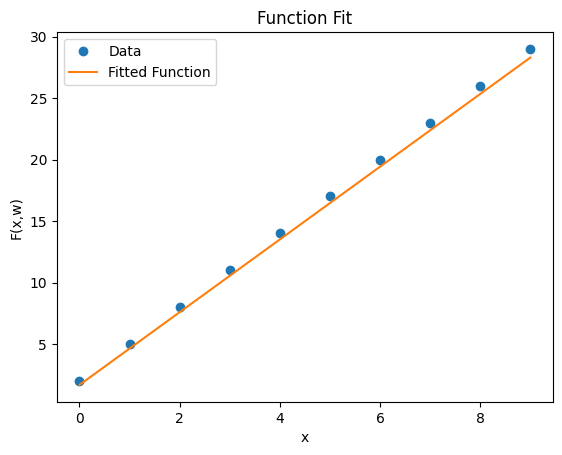

In [3]:
import matplotlib.pyplot as plt

# Plot the function F(x,w) against the x_list, y_List data
plt.plot(x_list, y_list, 'o', label='Data')
# Detach the tensor before plotting
plt.plot(x_list, [f(x, (float(w_test[0]), float(w_test[1]))) for x in x_list], label='Fitted Function')
plt.xlabel('x')
plt.ylabel('F(x,w)')
plt.title('Function Fit')
plt.legend()
plt.show()

In [4]:
# Visualize Computation Graph
!pip install torchviz

x_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_list=[2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0]
pred_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3145.0


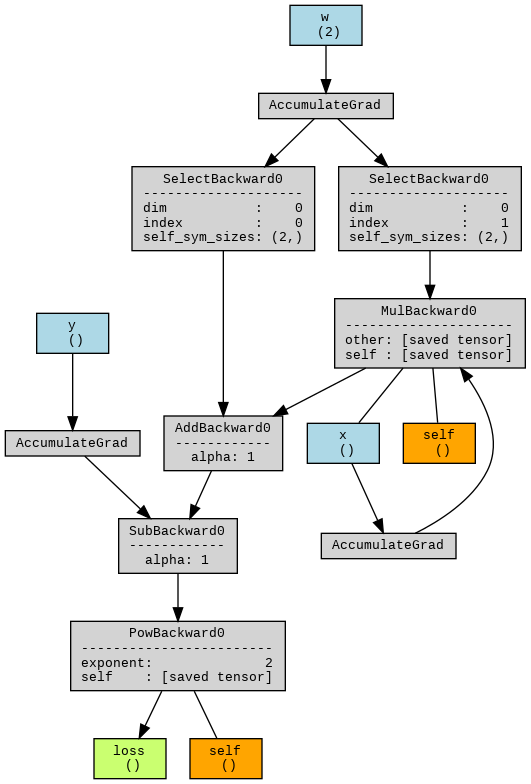

In [5]:
from torchviz import make_dot
from IPython.display import Image

# Define the function
def f(x, w):
  return w[0] + w[1] * x

w_orig = (2.0,3.0)
# Initialize the weights
w_test=(0.0,0.0)
w = torch.tensor(w_test, requires_grad=True)
x_list = list(range(10))
y_list = [f(x, w_orig) for x in x_list]
pred_list = [f(x, w_test) for x in x_list]
# Define the input data
print (f"{x_list=}")
print (f"{y_list=}")
print (f"{pred_list=}")
learning_rate=0.03
print (f"{sum([(y-f(x, w_test))**2 for x,y in zip(x_list,y_list)])}")
item = 4
w = torch.tensor(w_test, requires_grad=True)
x = torch.tensor(x_list[item], dtype=torch.float32, requires_grad=True)
y = torch.tensor(y_list[item], dtype=torch.float32, requires_grad=True)
loss = (y - f(x, w))**2

# Render graph
dot = make_dot(loss, params={'loss': loss, 'w': w, 'x': x, 'y': y}, show_attrs=True, show_saved=True)
dot.render("computation_graph", format="png")  # Save the graph as a PNG image

# Display the saved image
Image(filename='computation_graph.png')



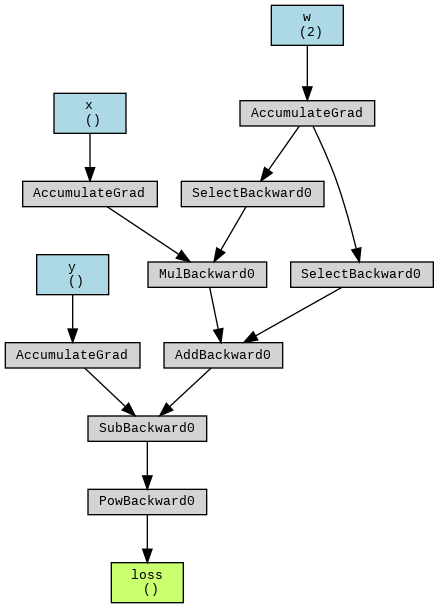

In [6]:
# Render graph
dot = make_dot(loss, params={'loss': loss, 'w': w, 'x': x, 'y': y})
dot.render("computation_graph", format="png")  # Save the graph as a PNG image

# Display the saved image
Image(filename='computation_graph.png')